In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
y_valid = df_valid['label']

X_train = pd.concat([X_train, X_valid], axis=0)
y_train = pd.concat([y_train, y_valid], axis=0)

# fit and transform scaler on training data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)

print(X_train_norm)
X_train_norm.shape, y_train.shape

[[0.00000000e+00 7.92518624e-05 0.00000000e+00 ... 0.00000000e+00
  2.05947772e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.92518624e-05 3.35195531e-03 ... 0.00000000e+00
  1.23568663e-04 2.36593060e-03]
 ...
 [0.00000000e+00 7.92518624e-05 5.58659218e-04 ... 0.00000000e+00
  0.00000000e+00 1.18296530e-03]
 [0.00000000e+00 2.37755587e-04 0.00000000e+00 ... 0.00000000e+00
  8.23791087e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.05947772e-05 0.00000000e+00]]


((47600, 104), (47600,))

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=200, n_jobs=-1)
rnd_clf.fit(X_train_norm, y_train)

RandomForestClassifier(max_leaf_nodes=200, n_estimators=1000, n_jobs=-1)

In [5]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# transform testing data
X_test_norm = norm.transform(X_test)

X_test_norm.shape, y_test.shape
y_pred = rnd_clf.predict(X_test_norm)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9772268907563025


In [7]:
# visualisation of results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['.html', '.java', '.py', '.c', '.cpp', '.rb', '.php']
confusion_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print(confusion_matrix)

[[1599    0   12    0    1    0    9]
 [   0 1722    0    0    1    0    1]
 [   7    1 1663    1    1    2    0]
 [   0    4    6 1654   57    1    0]
 [   0    1    4  125 1571    0    0]
 [   3    0   20    2    1 1722    0]
 [   6    2    3    0    0    0 1698]]


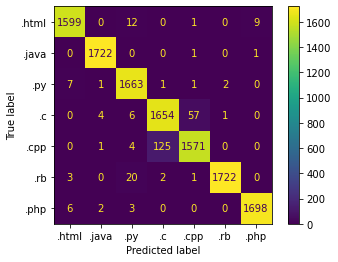

In [8]:
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
display.plot()

In [9]:
# to check count
from collections import Counter

print(Counter(y_pred))
print(Counter(y_test))

Counter({'.c': 1782, '.java': 1730, '.rb': 1725, '.php': 1708, '.py': 1708, '.cpp': 1632, '.html': 1615})
Counter({'.rb': 1748, '.java': 1724, '.c': 1722, '.php': 1709, '.cpp': 1701, '.py': 1675, '.html': 1621})


In [6]:
import pickle
# save the model to disk
pickle.dump(rnd_clf, open('rnd_clf.pkl', 'wb'))